# Задача 1 (Парадокс инспектора)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def schedule():
    schedule = []
    time = 8 * 60 
    while time < 20 * 60:
        schedule.append(time)
        time += np.random.choice([5, 10])
    return schedule

def calculate_num_buses(generate_schedule):
    schedule = generate_schedule()
    return len(schedule)

#функция по подсчёту кол-ва пассажиров в автобусе, выбраном Тимоном
def calculate_passengers_on_timon_bus(generate_schedule):
    schedule = generate_schedule()
    num_buses = len(schedule)
    random_bus_index = np.random.randint(num_buses)
    bus_time = schedule[random_bus_index]
    interval = 0
    if random_bus_index == 0:
        interval = bus_time - 8 * 60
    else:
        interval = bus_time - schedule[random_bus_index - 1]
    num_passengers = np.random.poisson(interval/2)
    return num_passengers

#функция по подсчёту кол-ва пассажиров в автобусе, выбраном Пумбой
def calculate_passengers_on_pumba_bus(generate_schedule):
    pumbaa_time = np.random.randint(8 * 60, 20 * 60)
    schedule = generate_schedule()
    next_bus_index = np.argmax(np.array(schedule) > pumbaa_time)
    if next_bus_index == 0:
        interval = schedule[0] - 8 * 60
    else:
        interval = schedule[next_bus_index] - schedule[next_bus_index - 1]
    num_passengers = np.random.poisson(interval/2)
    return num_passengers



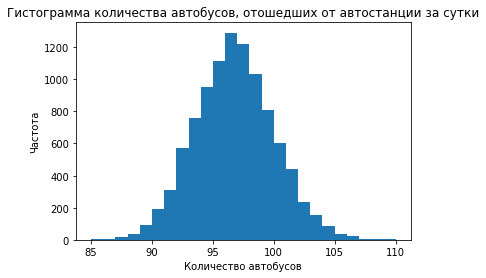

In [2]:
num_experiments = 10000

#подсчёт ежедневного кол-ва автобусов
num_buses_list = [calculate_num_buses(schedule) for _ in range(num_experiments)]
plt.hist(num_buses_list, bins=range(min(num_buses_list), max(num_buses_list) + 2, 1))
plt.title("Гистограмма количества автобусов, отошедших от автостанции за сутки")
plt.xlabel("Количество автобусов")
plt.ylabel("Частота")
plt.show()



Вывод по гистограмме: Распределение визуально очень похоже на нормальное, аргументировать это можно тем, что пиковая частота автобусов находится в значении между 95 и 100 по оси Ox - центре оси, которая показывает количество автобусов, а также симметричными боковыми значениями.

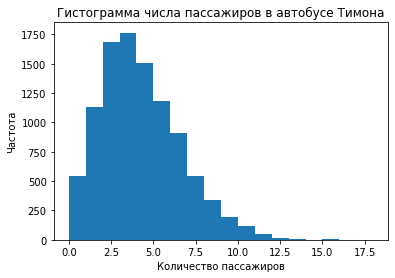

In [3]:
#рассчёт количества пассажиров в автобусе Тимона
passengers_on_timon_bus_list = [calculate_passengers_on_timon_bus(schedule) for _ in range(num_experiments)]
plt.hist(passengers_on_timon_bus_list, bins=range(min(passengers_on_timon_bus_list), max(passengers_on_timon_bus_list) + 2, 1))
plt.title("Гистограмма числа пассажиров в автобусе Тимона")
plt.xlabel("Количество пассажиров")
plt.ylabel("Частота")
plt.show()

Вывод по гистограмме: Распределение визуально очень похоже на положительно скошенное распределение, аргументировать это можно тем, что пиковая частота автобусов находится в значении между 2.5 и 5.0 по оси Ox - левой части оси, которая показывает количество автобусов, а также боковые значения не семетричны.

In [4]:
#оценка математического ожидания и дисперсии в автобусе Тимона
mean_passengers_on_timon_bus = np.mean(passengers_on_timon_bus_list)
var_passengers_on_timon_bus = np.var(passengers_on_timon_bus_list)
print("Математическое ожидание числа пассажиров в автобусе Тимона:", mean_passengers_on_timon_bus)
print("Дисперсия числа пассажиров в автобусе Тимона:", var_passengers_on_timon_bus)

Математическое ожидание числа пассажиров в автобусе Тимона: 3.7561
Дисперсия числа пассажиров в автобусе Тимона: 5.600812789999999


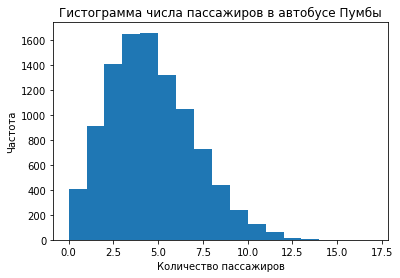

In [5]:
#рассчёт количества пассажиров в автобусе Пумбы
passengers_on_pumba_bus_list = [calculate_passengers_on_pumba_bus(schedule) for _ in range(num_experiments)]
plt.hist(passengers_on_pumba_bus_list, bins=range(min(passengers_on_pumba_bus_list), max(passengers_on_pumba_bus_list) + 2, 1))
plt.title("Гистограмма числа пассажиров в автобусе Пумбы")
plt.xlabel("Количество пассажиров")
plt.ylabel("Частота")
plt.show()


Вывод по гистограмме: Распределение визуально очень похоже на положительно скошенное распределение, аргументировать это можно тем, что пиковая частота автобусов находится в значении близком к 5.0 по оси Ox - левой части оси, которая показывает количество автобусов, а также боковые значения не семетричны.

In [6]:
#оценка математического ожидания и дисперсии в автобусе Пумбы
mean_passengers_on_pumba_bus = np.mean(passengers_on_pumba_bus_list)
var_passengers_on_pumba_bus = np.var(passengers_on_pumba_bus_list)
print("Математическое ожидание числа пассажиров в автобусе Пумбы:", mean_passengers_on_pumba_bus)
print("Дисперсия числа пассажиров в автобусе Пумбы:", var_passengers_on_pumba_bus)

Математическое ожидание числа пассажиров в автобусе Пумбы: 4.1086
Дисперсия числа пассажиров в автобусе Пумбы: 5.62840604


# Для экспоненциального распределения времени между автобусами

In [7]:
def schedule_exp():
    schedule = []
    time = 8 * 60 #начало отсчёта времени
    while time < 20 * 60:
        schedule.append(time)
        time += np.random.exponential(scale=10)
    return schedule


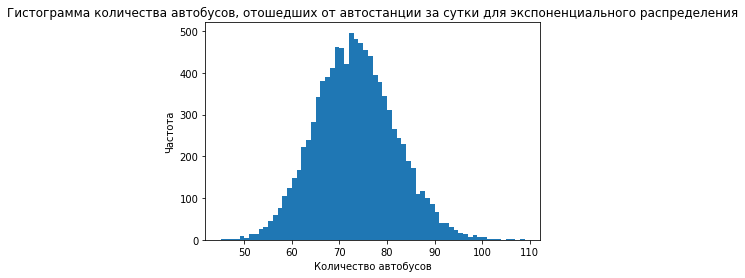

In [8]:
#подсчёт ежедневного кол-ва автобусов для экспоненциального распределения
num_buses_list_exp = [calculate_num_buses(schedule_exp) for _ in range(num_experiments)]
plt.hist(num_buses_list_exp, bins=range(min(num_buses_list_exp), max(num_buses_list_exp) + 2, 1))
plt.title("Гистограмма количества автобусов, отошедших от автостанции за сутки для экспоненциального распределения")
plt.xlabel("Количество автобусов")
plt.ylabel("Частота")
plt.show()



Вывод по гистограмме: Распределение визуально довольно похоже на нормальное, за исключением довольно резкого падения графика в точке близкой к значению 72 по оси Ox. Аргументировать это можно тем, что пиковая частота автобусов находится в значении близком к 75 по оси Ox - центре оси, которая показывает количество автобусов, а также симметричными боковыми значениями.

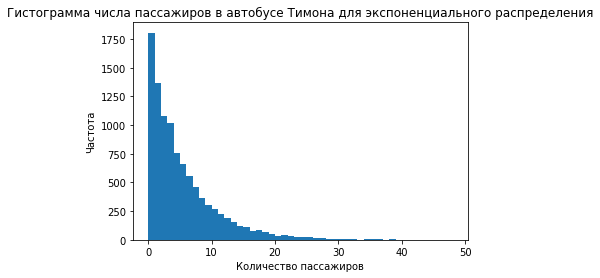

In [9]:
#рассчёт количества пассажиров в автобусе Тимона для экспоненциального распределения
passengers_on_timon_bus_list_exp = [calculate_passengers_on_timon_bus(schedule_exp) for _ in range(num_experiments)]
plt.hist(passengers_on_timon_bus_list_exp, bins=range(min(passengers_on_timon_bus_list_exp), max(passengers_on_timon_bus_list_exp) + 2, 1))
plt.title("Гистограмма числа пассажиров в автобусе Тимона для экспоненциального распределения")
plt.xlabel("Количество пассажиров")
plt.ylabel("Частота")
plt.show()

Вывод по гистограмме: Распределение визуально похоже на усечённое распределение с обрывом слева. Аргументировать это можно тем, что гистограмма построена для экспоненциального распределения.

In [10]:
#оценка математического ожидания и дисперсии в автобусе Тимона для экспоненциального распределения
mean_passengers_on_timon_bus_exp = np.mean(passengers_on_timon_bus_list_exp)
var_passengers_on_timon_bus_exp = np.var(passengers_on_timon_bus_list_exp)
print("Математическое ожидание числа пассажиров в автобусе Тимона для экспоненциального распределения:", mean_passengers_on_timon_bus_exp)
print("Дисперсия числа пассажиров в автобусе Тимона для экспоненциального распределения:", var_passengers_on_timon_bus_exp)

Математическое ожидание числа пассажиров в автобусе Тимона для экспоненциального распределения: 4.9652
Дисперсия числа пассажиров в автобусе Тимона для экспоненциального распределения: 30.73358896


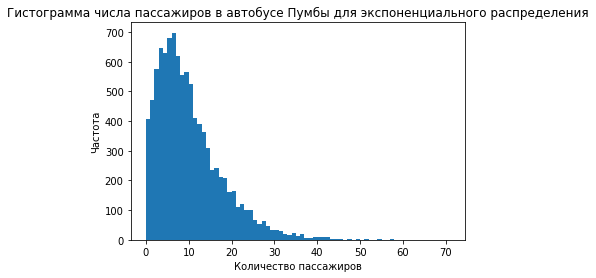

In [11]:
#рассчёт количества пассажиров в автобусе Пумбы для экспоненциального распределения
passengers_on_pumba_bus_list_exp = [calculate_passengers_on_pumba_bus(schedule_exp) for _ in range(num_experiments)]
plt.hist(passengers_on_pumba_bus_list_exp, bins=range(min(passengers_on_pumba_bus_list_exp), max(passengers_on_pumba_bus_list_exp) + 2, 1))
plt.title("Гистограмма числа пассажиров в автобусе Пумбы для экспоненциального распределения")
plt.xlabel("Количество пассажиров")
plt.ylabel("Частота")
plt.show()


Вывод по гистограмме: Распределение визуально похоже на положительно скошенное распределение, причём с некой схожестью с усечённым распределением с обрывом слева. Аргументировать это можно тем, что гистограмма построена для экспоненциального распределения.

In [12]:
#оценка математического ожидания и дисперсии в автобусе Пумбы для экспоненциального распределения
mean_passengers_on_pumba_bus_exp = np.mean(passengers_on_pumba_bus_list_exp)
var_passengers_on_pumba_bus_exp = np.var(passengers_on_pumba_bus_list_exp)
print("Математическое ожидание числа пассажиров в автобусе Пумбы для экспоненциального распределения:", mean_passengers_on_pumba_bus_exp)
print("Дисперсия числа пассажиров в автобусе Пумбы для экспоненциального распределения:", var_passengers_on_pumba_bus_exp)

Математическое ожидание числа пассажиров в автобусе Пумбы для экспоненциального распределения: 9.7409
Дисперсия числа пассажиров в автобусе Пумбы для экспоненциального распределения: 59.768567190000006


Если время между автобусами распределить экспоненциально со средним значением 10 минут, количество автобусов, отправляющихся с автостанции в течение дня, сократится.
Количество же пассажиров в автобусах, выбранных инспекторами Тимоном и Пумбой, по-прежнему будет подчиняться распределению Пуассона (нормальному распределению), но ожидаемое количество пассажиров увеличится в зависимости от нового распределения временных интервалов. Для выполнения этого задания мне потребовалось изучить функции библиотеки matplotlib.pyplot, а также алгоритмы, выложенные в открытом доступе на этом сайте https://scipy.org/

# Задача 2 (Парадокс Хуана Мануэля Родригеса Паррондо)

# 10 случайных траекторий изменений богатства Атоса


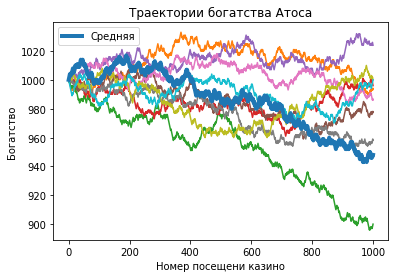

In [13]:
for i in range(10):
    np.random.seed(i)
    athos_wealth = [1000]
    for j in range(1000):
        win = np.random.choice([-1, 1], p=[0.51, 0.49])
        athos_wealth.append(athos_wealth[-1] + win)
    plt.plot(athos_wealth)

np.random.seed(0)

avg_athos_wealth = [1000]
for j in range(1000):
    win = np.random.choice([-1, 1], p=[0.51, 0.49])
    avg_athos_wealth.append(avg_athos_wealth[-1] + win)
plt.plot(avg_athos_wealth, linewidth=4, label='Средняя')

plt.title("Траектории богатства Атоса")
plt.xlabel('Номер посещени казино')
plt.ylabel('Богатство')
plt.legend()
plt.show()


Вывод по графику: в лучшем случае Атос выйдет в небольшой плюс (фиолетовая траектория), в 4 случаях (оранжевая, оливковая, красная и голубая траектории) Атос выйдет в 0, то есть ничего не проиграет, но и ничего не приобретёт. Остальные 5 траекторий показывают, что Атос явно проиграет свои богатства. Усреднённая траекторыя выделена жирным для наглядности, и мы явно можем судить, что в среднем Атос проиграет около 5% своих богатств за тысячу визитов в казино(снижение с 1000 до 950 по оси Oy).

# 10 случайных траекторий изменений богатства Портоса


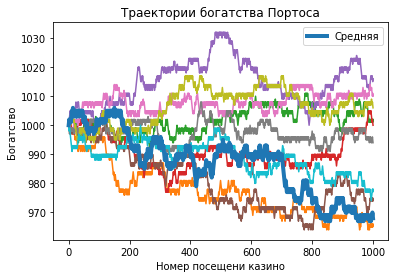

In [14]:
for i in range(10):
    np.random.seed(i)
    porthos_wealth = [1000]
    for j in range(1000):
        if porthos_wealth[-1] % 3 == 0:
            win = np.random.choice([-1, 1], p=[0.91, 0.09])
        else:
            win = np.random.choice([-1, 1], p=[0.26, 0.74])
        porthos_wealth.append(porthos_wealth[-1] + win)
    plt.plot(porthos_wealth)

np.random.seed(0)
avg_porthos_wealth = [1000]
for j in range(1000):
    if avg_porthos_wealth[-1] % 3 == 0:
        win = np.random.choice([-1, 1], p=[0.91, 0.09])
    else:
        win = np.random.choice([-1, 1], p=[0.26, 0.74])
    avg_porthos_wealth.append(avg_porthos_wealth[-1] + win)
plt.plot(avg_porthos_wealth, linewidth=4, label='Средняя')

plt.title("Траектории богатства Портоса")
plt.xlabel('Номер посещени казино')
plt.ylabel('Богатство')
plt.legend()
plt.show()


Вывод по графику: у Портоса (в отличии с Атосом) намного больше шансов выиграть за 1000 походов в казино (фиолетовая, розовая, оливковая траектории), но даже несмотря на этот факт, усреднённая траектория подобно Атосу движется к снижению богатств. Хотя мы можем сказать, что с большей вероятностью Портос потеряет в казино меньше, чем Атос, ведб за тысячу походов в среднем его богатство снизится примерно на 3% (от 1000 до 970 по оси Oy).

# 10 случайных траекторий изменений богатства Арамиса


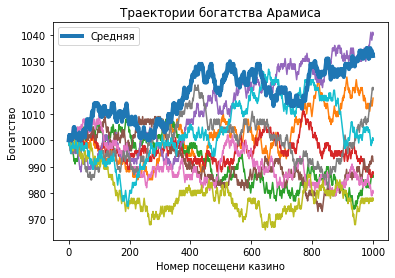

In [15]:
for i in range(10):
    np.random.seed(i)
    aramis_wealth = [1000]
    for j in range(1000):
        if np.random.choice([True, False]):
            win = np.random.choice([-1, 1], p=[0.51, 0.49])
        else:
            if aramis_wealth[-1] % 3 == 0:
                win = np.random.choice([-1, 1], p=[0.91, 0.09])
            else:
                win = np.random.choice([-1, 1], p=[0.26, 0.74])
        aramis_wealth.append(aramis_wealth[-1] + win)
    plt.plot(aramis_wealth)

np.random.seed(0)
avg_aramis_wealth = [1000]

for j in range(1000):
    if np.random.choice([True, False]):
        win = np.random.choice([-1, 1], p=[0.51, 0.49])
    else:
        if avg_aramis_wealth[-1] % 3 == 0:
            win = np.random.choice([-1, 1], p=[0.91, 0.09])
        else:
            win = np.random.choice([-1, 1], p=[0.26, 0.74])
    avg_aramis_wealth.append(avg_aramis_wealth[-1] + win)
plt.plot(avg_aramis_wealth, linewidth=4, label='Средняя')

plt.title("Траектории богатства Арамиса")
plt.xlabel('Номер посещени казино')
plt.ylabel('Богатство')
plt.legend()
plt.show()

Вывод по графику: вероятность выиграша Арамиса - наибольшая среди троих участноиков. Средняя траектория - растёт, следовательно для приумножения своих богатств Арамису стоит ходить в казино, ведь через 1000 посящений он в среднем увеличит свои богатства на 3% (от 1000 до 1030 по оси Oy).

# Задача 3 (Парадокс Берксона)

In [16]:
from scipy.stats import norm, pearsonr
mean = 60
std_dev = 10


In [17]:
def simulate_scores(n):
    ru_scores = norm.rvs(loc=mean, scale=std_dev, size=n)
    math_scores = norm.rvs(loc=mean, scale=std_dev, size=n)
    total_scores = ru_scores + math_scores
    return ru_scores, math_scores, total_scores


In [18]:
pass_counts = []
ru_math_corr_passed = []
ru_math_corr_failed = []

for n in range(80, 165, 5):
    pass_count = 0
    ru_scores, math_scores, total_scores = simulate_scores(10000)
    for i in range(10000):
        if total_scores[i] > n:
            pass_count += 1
    pass_counts.append(pass_count)

    passed_indices = np.where(total_scores > n)
    ru_math_corr_passed.append(pearsonr(ru_scores[passed_indices], math_scores[passed_indices])[0])

    failed_indices = np.where(total_scores <= n)
    ru_math_corr_failed.append(pearsonr(ru_scores[failed_indices], math_scores[failed_indices])[0])


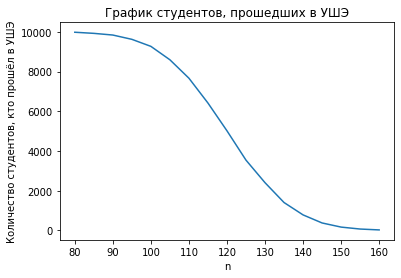

In [19]:
plt.plot(range(80, 165, 5), pass_counts)
plt.title("График студентов, прошедших в УШЭ")
plt.xlabel('n')
plt.ylabel('Количество студентов, кто прошёл в УШЭ')
plt.show()

Вывод по графику: зависимость графика не линейна и мы можем сказать, что эта функция зеркальна плотности вероятности для нормального распределения.

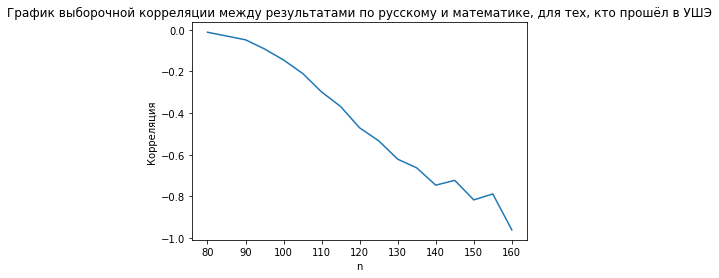

In [20]:
plt.plot(range(80, 165, 5), ru_math_corr_passed)
plt.title("График выборочной корреляции между результатами по русскому и математике, для тех, кто прошёл в УШЭ")
plt.xlabel('n')
plt.ylabel('Корреляция')
plt.show()

Вывод по графику: график движется вниз с резкими скачками на отметках 145 и 155.

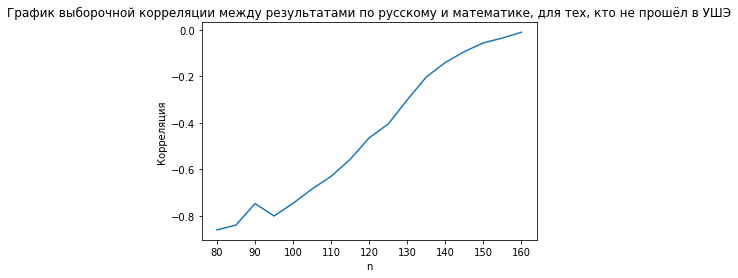

In [21]:
plt.plot(range(80, 165, 5), ru_math_corr_failed)
plt.title("График выборочной корреляции между результатами по русскому и математике, для тех, кто не прошёл в УШЭ")
plt.xlabel('n')
plt.ylabel('Корреляция')
plt.show()

Вывод по графику: график движется вверх с резким скачком на отметке 90 по оси Ox.